In [1]:
# Load data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_df, test_df = pd.read_csv('./train_data_balanced.csv'), pd.read_csv('./test_data.csv')
X_train, X_test = train_df.drop('target', axis=1), test_df.drop('target', axis=1)
y_train, y_test = train_df['target'], test_df['target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def summary(y_pred, model = None):
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if model is not None:
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        print("\nFeature Importance:")
        print(feature_importance)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Default (0)', 'Default (1)'], 
                yticklabels=['Non-Default (0)', 'Default (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [2]:
results = {
    'Model': [],
    'Accuracy': [],
    'AUC': [],
    'Precision (1)': [],
    'Recall (1)': [],
    'F1 (1)': [],
    'Precision (0)': [],
    'Recall (0)': [],
    'F1 (0)': [],
}

Model Accuracy: 0.9239204934886909

Confusion Matrix:
[[1125   43]
 [  68  223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1168
           1       0.84      0.77      0.80       291

    accuracy                           0.92      1459
   macro avg       0.89      0.86      0.88      1459
weighted avg       0.92      0.92      0.92      1459


Feature Importance:
    Feature  Importance
7    DELINQ    0.203548
11  DEBTINC    0.141308
9      NINQ    0.097652
6     DEROG    0.088131
8     CLAGE    0.084944
2     VALUE    0.067836
0      LOAN    0.060834
1   MORTDUE    0.060363
10     CLNO    0.059190
5       YOJ    0.056447
3    REASON    0.040133
4       JOB    0.039616


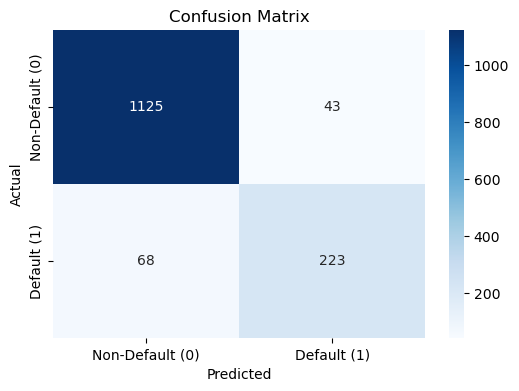

In [3]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('RandomForest')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred, forest)

Model Accuracy: 0.8128855380397533

Confusion Matrix:
[[996 172]
 [101 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1168
           1       0.52      0.65      0.58       291

    accuracy                           0.81      1459
   macro avg       0.72      0.75      0.73      1459
weighted avg       0.83      0.81      0.82      1459


Feature Importance:
    Feature  Importance
7    DELINQ    0.541974
11  DEBTINC    0.170016
6     DEROG    0.129918
8     CLAGE    0.072880
9      NINQ    0.045532
2     VALUE    0.013289
4       JOB    0.011679
10     CLNO    0.007865
5       YOJ    0.005868
3    REASON    0.000978
0      LOAN    0.000000
1   MORTDUE    0.000000


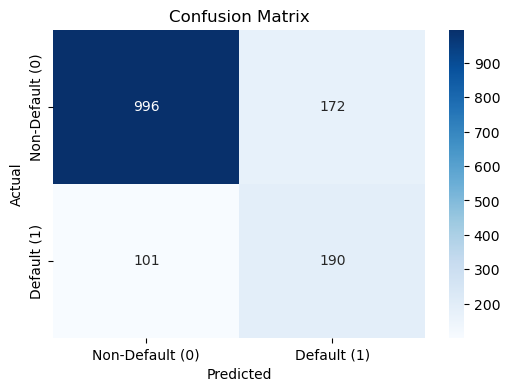

In [4]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('DecisionTree')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred, tree)

Model Accuracy: 0.9506511309115833

Confusion Matrix:
[[1156   12]
 [  60  231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1168
           1       0.95      0.79      0.87       291

    accuracy                           0.95      1459
   macro avg       0.95      0.89      0.92      1459
weighted avg       0.95      0.95      0.95      1459



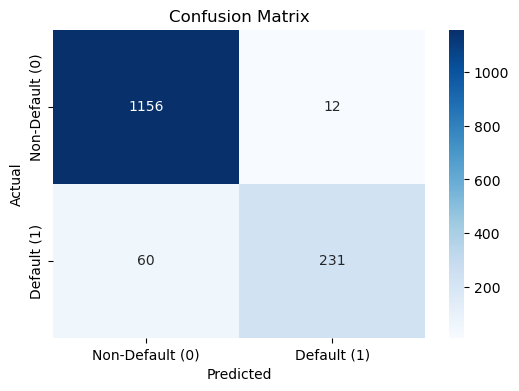

In [5]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('KNN')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred)

Model Accuracy: 0.8574366004112406

Confusion Matrix:
[[1034  134]
 [  74  217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1168
           1       0.62      0.75      0.68       291

    accuracy                           0.86      1459
   macro avg       0.78      0.82      0.79      1459
weighted avg       0.87      0.86      0.86      1459



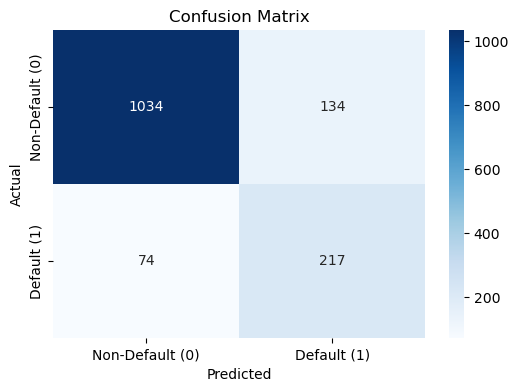

In [6]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('SVM')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred)

Model Accuracy: 0.9225496915695682

Confusion Matrix:
[[1130   38]
 [  75  216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1168
           1       0.85      0.74      0.79       291

    accuracy                           0.92      1459
   macro avg       0.89      0.85      0.87      1459
weighted avg       0.92      0.92      0.92      1459



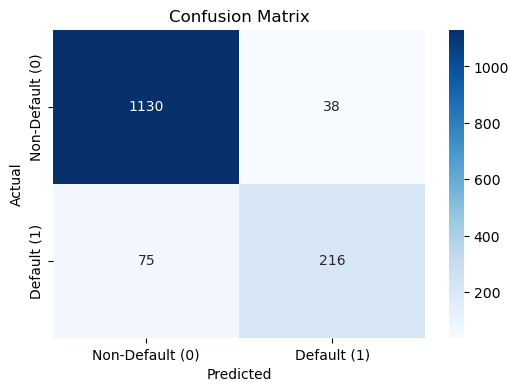

In [7]:
# XGboost
from xgboost import XGBClassifier
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(params, dtrain, num_boost_round=100)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('XGBoost')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred)

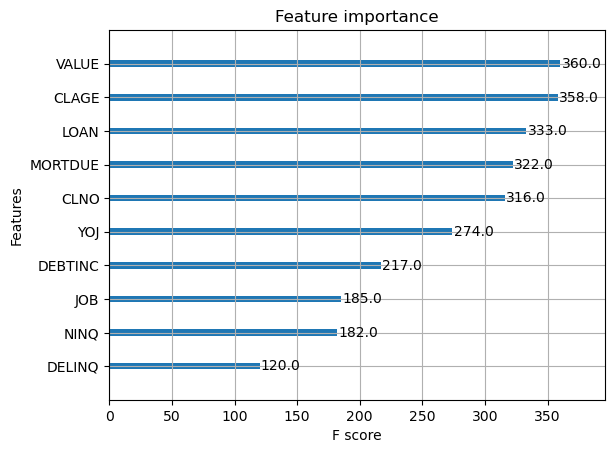

In [8]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10)
plt.show()

Model Accuracy: 0.9198080877313228

Confusion Matrix:
[[1120   48]
 [  69  222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1168
           1       0.82      0.76      0.79       291

    accuracy                           0.92      1459
   macro avg       0.88      0.86      0.87      1459
weighted avg       0.92      0.92      0.92      1459



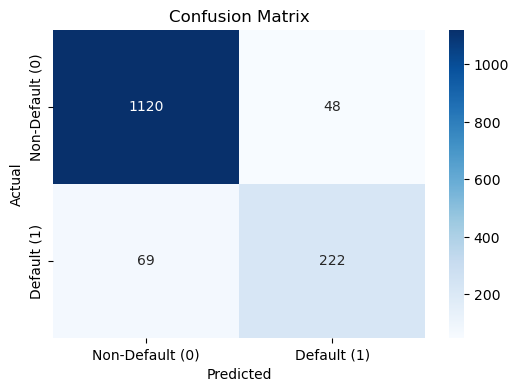

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=9,
    min_samples_split=2,
    random_state=42
)

gbdt.fit(X_train, y_train)

y_pred = gbdt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
results['Model'].append('GBDT')
results['Accuracy'].append(round(accuracy, 3))
results['AUC'].append(round(auc, 3))
results['Precision (1)'].append(round(report['1']['precision'], 3))
results['Recall (1)'].append(round(report['1']['recall'], 3))
results['F1 (1)'].append(round(report['1']['f1-score'], 3))
results['Precision (0)'].append(round(report['0']['precision'], 3))
results['Recall (0)'].append(round(report['0']['recall'], 3))
results['F1 (0)'].append(round(report['0']['f1-score'], 3))
summary(y_pred)

In [10]:
# Comparison
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,AUC,Precision (1),Recall (1),F1 (1),Precision (0),Recall (0),F1 (0)
0,RandomForest,0.924,0.865,0.838,0.766,0.801,0.943,0.963,0.953
1,DecisionTree,0.813,0.753,0.525,0.653,0.582,0.908,0.853,0.879
2,KNN,0.951,0.892,0.951,0.794,0.865,0.951,0.990,0.970
3,SVM,0.857,0.815,0.618,0.746,0.676,0.933,0.885,0.909
4,XGBoost,0.923,0.855,0.850,0.742,0.793,0.938,0.967,0.952
5,GBDT,0.920,0.861,0.822,0.763,0.791,0.942,0.959,0.950


In [11]:
results_df.sort_values('AUC', axis=0, ascending=False, inplace=True)
results_df

,Model,Accuracy,AUC,Precision (1),Recall (1),F1 (1),Precision (0),Recall (0),F1 (0)
2,KNN,0.951,0.892,0.951,0.794,0.865,0.951,0.990,0.970
0,RandomForest,0.924,0.865,0.838,0.766,0.801,0.943,0.963,0.953
5,GBDT,0.920,0.861,0.822,0.763,0.791,0.942,0.959,0.950
4,XGBoost,0.923,0.855,0.850,0.742,0.793,0.938,0.967,0.952
3,SVM,0.857,0.815,0.618,0.746,0.676,0.933,0.885,0.909
1,DecisionTree,0.813,0.753,0.525,0.653,0.582,0.908,0.853,0.879
